In this project, we combined email datasets from two sources for phishing detection. The combined dataset (before cleaning) includes :

Enron (Benign):
~15,000 non-phishing emails extracted from the Enron email corpus — widely regarded as a reliable dataset for legitimate communications.

Kaggle Phishing Dataset:
~10,000 phishing emails collected from Kaggle's phishing email dataset, labeled as phishing (label = 1).


## 1.Preprocessing Steps

Standardized column names and encodings.

Added a label column:

1 for phishing

0 for benign (Enron)

Concatenated all datasets with a Source column.

Checked and removed duplicate emails (based on the Message field), even if they came from different sources.

Saved final result as combined_raw_dataset.csv.


In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install seaborn


In [4]:
!pip install nltk

In [5]:
!pip install wordcloud

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import Counter
from wordcloud import WordCloud
import nltk
import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/azaleadj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/azaleadj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import os


os.chdir("/Users/azaleadj/Desktop/Uvic/summer/592/project/Summer-2025-ECE-597-Group4/DataPreprocessing")


print("Current directory:", os.getcwd())


Current directory: /Users/azaleadj/Desktop/Uvic/summer/592/project/Summer-2025-ECE-597-Group4/DataPreprocessing


Preprocessing Steps
Standardized column names and encodings.

Added a label column:

1 for phishing

0 for benign (Enron)

Concatenated all datasets with a Source column.

Checked and removed duplicate emails (based on the Message field), even if they came from different sources.

Saved final result as combined_raw_dataset.csv.


In [16]:
import pandas as pd

# read every CSV file

df_phishing = pd.read_csv("phishing_email.csv")


# check every DataFrame culumn

print("phishing_email:", df_phishing.columns.tolist())



phishing_email: ['text_combined', 'label']


In [17]:

# rename text_combined
all_emails_df = pd.DataFrame({
    'Message': df_phishing['text_combined'],
    'label': df_phishing['label']
})
# df_phishing_clean = pd.DataFrame({
#     'Message': df_phishing['text_combined'],
#     'label': df_phishing['label']
# })


In [18]:
all_emails_df.head()

,Message,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


In [19]:
before = all_emails_df.shape[0]
all_emails_df.drop_duplicates(subset='Message', inplace=True)
after = all_emails_df.shape[0]
print(f"deleted duplicated emails: {before - after} ")

deleted duplicated emails: 408 


In [20]:
print(all_emails_df.shape)
print(all_emails_df['label'].value_counts())

(82078, 2)
label
1    42845
0    39233
Name: count, dtype: int64


In [21]:
import re
def clean_text(text):
    text = text.lower()
    # keep URL、email、HTML,number,$,@,:/
    
    text = re.sub(r'[^\x00-\x7f]', ' ', text)              # delete non ASCII
    text = re.sub(r'\b[a-z]{1,2}\b', '', text)             # delet short word
    text = re.sub(r'[^a-z0-9\s@$:/]', '', text)               
    text = re.sub(r'\s+', ' ', text).strip()
    return text



   


In [22]:
all_emails_df['Clean_Message'] = all_emails_df['Message'].apply(clean_text)



In [23]:
all_emails_df[['Message', 'Clean_Message', 'label']].head()


,Message,Clean_Message,label
0,hpl nom may 25 2001 see attached file hplno 52...,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,nom actual vols 24 forwarded sabrae zajac hou ...,0
2,enron actuals march 30 april 1 201 estimated a...,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,hpl nom june 1 2001 see attached file hplno 60...,0


In [24]:

from sklearn.utils import shuffle

# shuffle
all_emails_df = shuffle(all_emails_df, random_state=42).reset_index(drop=True)

In [25]:
all_emails_df.head()

,Message,label,Clean_Message
0,garp 2001 convention invitation speak invitati...,0,garp 2001 convention invitation speak invitati...
1,fly macromedia xp pro sp 2 adobe photoshop ms ...,1,fly macromedia pro 2 adobe photoshop office 2 ...
2,mr kala kabila kkkabila2003yahoocom kalla kabi...,1,kala kabila kkkabila2003yahoocom kalla kabila ...
3,william sister bright_william2008yahoocom dear...,1,william sister brightwilliam2008yahoocom dear ...
4,son masturbates watching mom sister pussies he...,1,son masturbates watching mom sister pussies he...


In [26]:
all_emails_df.to_csv("phishing_email_dataset.csv", index=False)


In [27]:
# View label distribution (counts and proportions)
label_counts = all_emails_df['label'].value_counts()
label_ratio = all_emails_df['label'].value_counts(normalize=True)

print("Label count distribution:\n", label_counts)
print("\nLabel proportion distribution:\n", label_ratio)


Label count distribution:
 label
1    42845
0    39233
Name: count, dtype: int64

Label proportion distribution:
 label
1    0.522003
0    0.477997
Name: proportion, dtype: float64


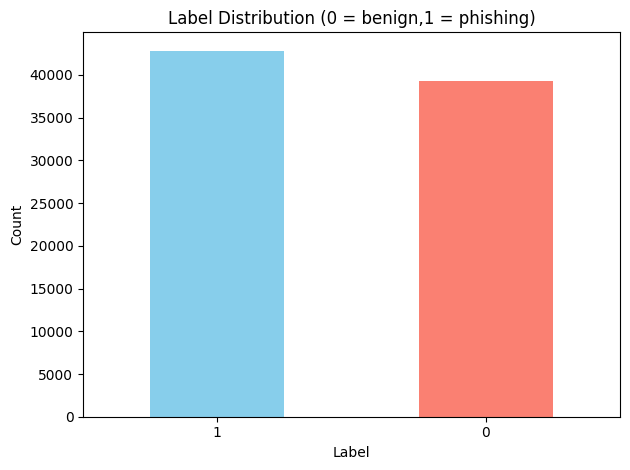

In [28]:
import matplotlib.pyplot as plt

label_counts = all_emails_df['label'].value_counts()
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Label Distribution (0 = benign,1 = phishing)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
